**This notebook demonstrates advanced gates**
$$
   \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
   \newcommand{\ket}[1]{\left|{#1}\right\rangle}
   \newcommand{\bra}[1]{\left\langle{#1}\right|}
$$

In [1]:
import os, sys
%matplotlib inline
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram
import numpy as np

# Import local tools
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import backend_tools
import tools

# Get a backend
IBMQ.load_accounts()
device = backend_tools.get_device(use_sim=True, min_qubits=2)

*This example implements the controlled-NOT gate in the reverse direction*

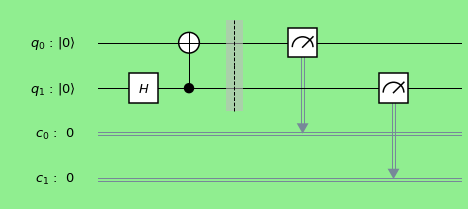

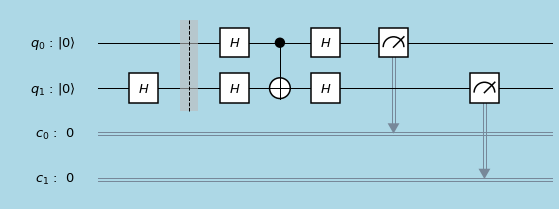

In [2]:
# Define the quantum circuits
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

# Build the circuits
circuits = []

# Circuit 1 - use the existing CNOT gate
circuit = QuantumCircuit(q, c)
circuit.h(q[1])
circuit.cx(q[1], q[0])
circuit.barrier()
circuit.measure(q, c)
circuits.append(circuit)

# Draw the circuit
style = {'backgroundcolor': 'lightgreen'}
tools.show_figure(circuit.draw(output='mpl', plot_barriers=True, reverse_bits=False, style=style, scale=0.7))

# Circuit 2 - manual construction
circuit = QuantumCircuit(q, c)
circuit.h(q[1])
circuit.barrier()
circuit.h(q)
circuit.cx(q[0], q[1])
circuit.h(q)
circuit.measure(q, c)
circuits.append(circuit)

# Draw the circuit
style = {'backgroundcolor': 'lightblue'}
tools.show_figure(circuits[1].draw(output='mpl', plot_barriers=True, reverse_bits=False, style=style, scale=0.7))

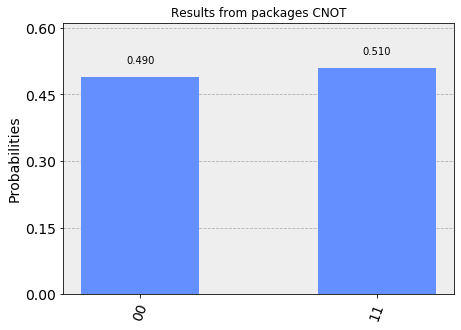

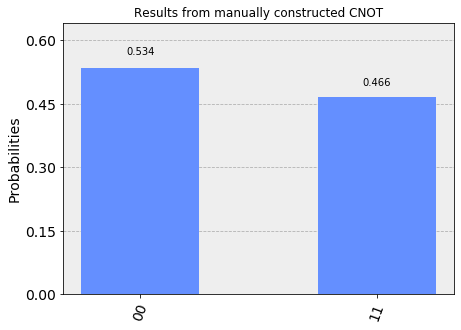

In [5]:
# Simulate or run the circuit
job = execute(circuits, backend=device, shots=1024)
result = job.result()

# Plot a histograms of the results
figs = []
num = 2
for i in range(num):
    counts = result.get_counts(circuits[i])
    #print(counts)
    if i == 0:
        title = "Results from packaged CNOT"
    else:
        title = "Results from manually constructed CNOT"
    tools.show_figure(plot_histogram(counts, title=title, bar_labels=True))

*This example implements the controlled-X gate*

The forumulation is based on the form: controlled-$P$ = $C^\dagger$ - CNOT - $C$, where:
- $P$ is a Paul gate, $X$, $Y$, or $Z$
- $C$ is a Clifford operation such as $I$, $S$ or $H$.

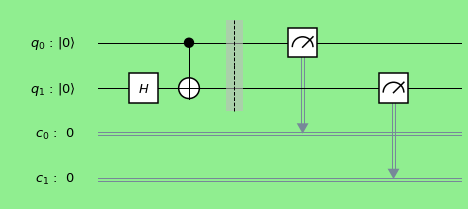

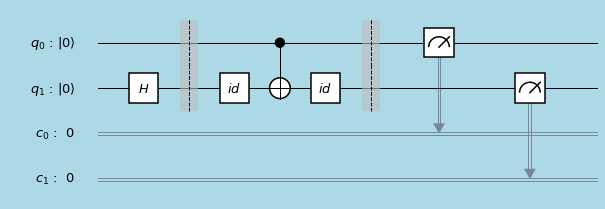

In [8]:
# Define the quantum circuits
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

# Build the circuits
circuits = []

# Circuit 1 - use the existing controlled-X gate
circuit = QuantumCircuit(q, c)
circuit.h(q[1])
circuit.cx(q[0], q[1])
circuit.barrier()
circuit.measure(q, c)
circuits.append(circuit)

# Draw the circuit
style = {'backgroundcolor': 'lightgreen'}
tools.show_figure(circuit.draw(output='mpl', plot_barriers=True, reverse_bits=False, style=style, scale=0.7))

# Circuit 2 - manual construction
circuit = QuantumCircuit(q, c)
circuit.h(q[1])
circuit.barrier()
circuit.iden(q[1])
circuit.cx(q[0], q[1])
circuit.iden(q[1])
circuit.barrier()
circuit.measure(q, c)
circuits.append(circuit)

# Draw the circuit
style = {'backgroundcolor': 'lightblue'}
tools.show_figure(circuits[1].draw(output='mpl', plot_barriers=True, reverse_bits=False, style=style, scale=0.7))

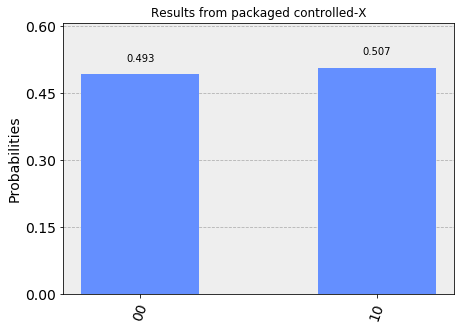

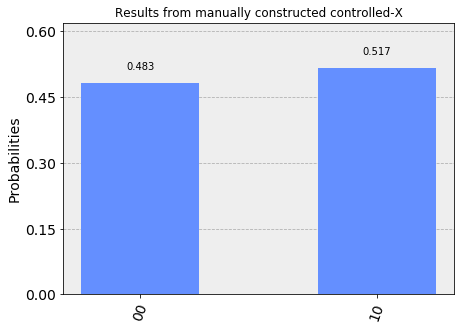

In [9]:
# Simulate or run the circuit
job = execute(circuits, backend=device, shots=1024)
result = job.result()

# Plot a histograms of the results
figs = []
num = 2
for i in range(num):
    counts = result.get_counts(circuits[i])
    #print(counts)
    if i == 0:
        title = "Results from packaged controlled-X"
    else:
        title = "Results from manually constructed controlled-X"
    tools.show_figure(plot_histogram(counts, title=title, bar_labels=True))

*This example implements the controlled-Y gate*

The forumulation is based on the form: controlled-$P$ = $C^\dagger$ - CNOT - $C$, where:
- $P$ is a Paul gate, $X$, $Y$, or $Z$
- $C$ is a Clifford operation such as $I$, $S$ or $H$.

In this case we:
- construct the initial state, the $\ket{\circlearrowright}$
- apply the controlled-Y gate
- measure in the Y-axis

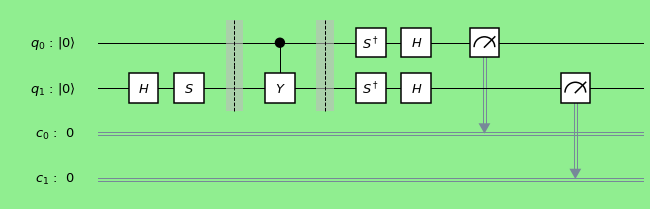

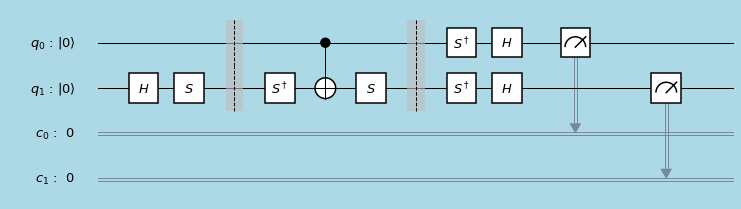

In [4]:
# Define the quantum circuits
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

# Build the circuits
circuits = []

# Circuit for measuring in Y-axis
meas_y = QuantumCircuit(q, c)
meas_y.barrier()
meas_y.sdg(q)
meas_y.h(q)
meas_y.measure(q, c)

# Circuit 1 - use the existing controlled-Y gate
circuit = QuantumCircuit(q, c)
circuit.h(q[1])
circuit.s(q[1])
circuit.barrier()
circuit.cy(q[0], q[1])
circuits.append(circuit+meas_y)

# Draw the circuit
style = {'backgroundcolor': 'lightgreen'}
tools.show_figure(circuits[0].draw(output='mpl', plot_barriers=True, reverse_bits=False, style=style, scale=0.7))

# Circuit 2 - manual construction
circuit = QuantumCircuit(q, c)
circuit.h(q[1])
circuit.s(q[1])
circuit.barrier()
circuit.sdg(q[1])
circuit.cx(q[0], q[1])
circuit.s(q[1])
circuits.append(circuit+meas_y)

# Draw the circuit
style = {'backgroundcolor': 'lightblue'}
tools.show_figure(circuits[1].draw(output='mpl', plot_barriers=True, reverse_bits=False, style=style, scale=0.7))

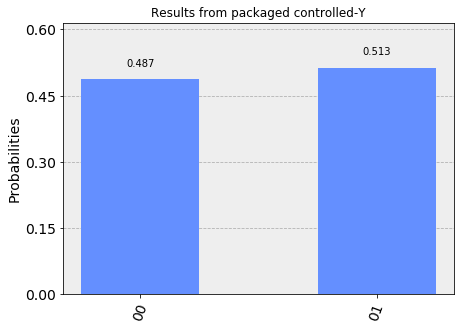

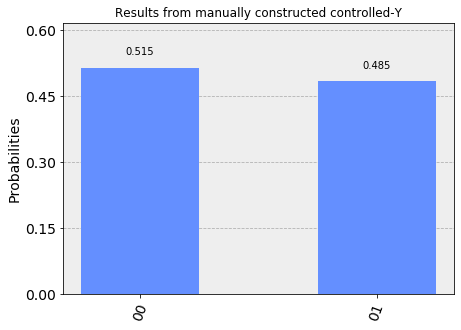

In [5]:
# Simulate or run the circuit
job = execute(circuits, backend=device, shots=1024)
result = job.result()

# Plot a histograms of the results
figs = []
num = 2
for i in range(num):
    counts = result.get_counts(circuits[i])
    #print(counts)
    if i == 0:
        title = "Results from packaged controlled-Y"
    else:
        title = "Results from manually constructed controlled-Y"
    tools.show_figure(plot_histogram(counts, title=title, bar_labels=True))

*This example implements the controlled-Z gate*

The forumulation is based on the form: controlled-$P$ = $C^\dagger$ - CNOT - $C$, where:
- $P$ is a Paul gate, $X$, $Y$, or $Z$
- $C$ is a Clifford operation such as $I$, $S$ or $H$.

In this case we:
- construct the initial state, the $\ket{\circlearrowright}$
- apply the controlled-Z gate
- measure in the Y-axis

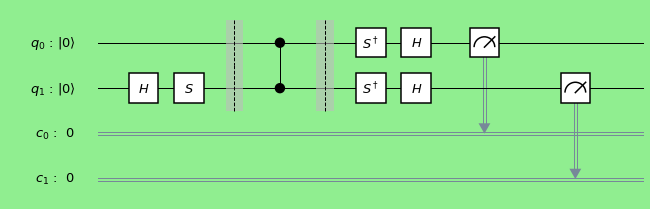

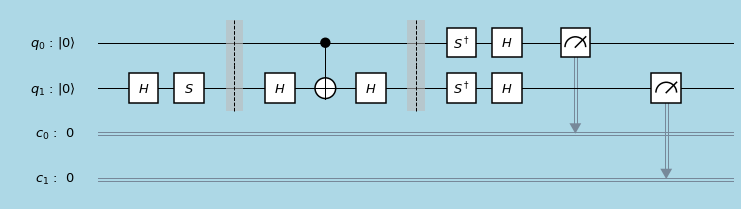

In [7]:
# Define the quantum circuits
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

# Build the circuits
circuits = []

# Circuit for measuring in Y-axis
meas_y = QuantumCircuit(q, c)
meas_y.barrier()
meas_y.sdg(q)
meas_y.h(q)
meas_y.measure(q, c)

# Circuit 1 - use the existing controlled-Y gate
circuit = QuantumCircuit(q, c)
circuit.h(q[1])
circuit.s(q[1])
circuit.barrier()
circuit.cz(q[0], q[1])
circuits.append(circuit+meas_y)

# Draw the circuit
style = {'backgroundcolor': 'lightgreen'}
tools.show_figure(circuits[0].draw(output='mpl', plot_barriers=True, reverse_bits=False, style=style, scale=0.7))

# Circuit 2 - manual construction
circuit = QuantumCircuit(q, c)
circuit.h(q[1])
circuit.s(q[1])
circuit.barrier()
circuit.h(q[1])
circuit.cx(q[0], q[1])
circuit.h(q[1])
circuits.append(circuit+meas_y)

# Draw the circuit
style = {'backgroundcolor': 'lightblue'}
tools.show_figure(circuits[1].draw(output='mpl', plot_barriers=True, reverse_bits=False, style=style, scale=0.7))

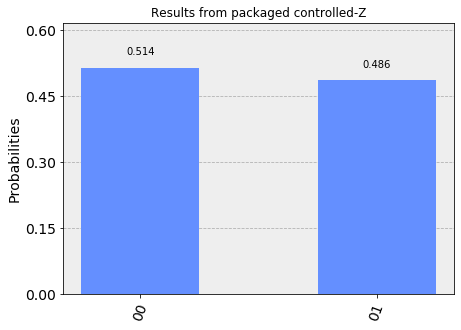

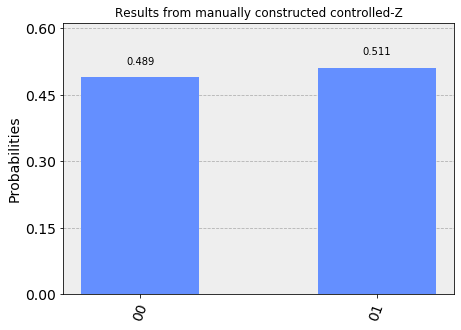

In [8]:
# Simulate or run the circuit
job = execute(circuits, backend=device, shots=1024)
result = job.result()

# Plot a histograms of the results
figs = []
num = 2
for i in range(num):
    counts = result.get_counts(circuits[i])
    #print(counts)
    if i == 0:
        title = "Results from packaged controlled-Z"
    else:
        title = "Results from manually constructed controlled-Z"
    tools.show_figure(plot_histogram(counts, title=title, bar_labels=True))